<a href="https://colab.research.google.com/github/rishika-saha/Computer_Vision/blob/main/CIFAR_10_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug 31 12:01:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
train_datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set=train_datagen.flow(x_train, y_train, batch_size=32)
test_datagen=ImageDataGenerator(rescale=1/255)
test_set=test_datagen.flow(x_test, y_test, batch_size=32)

In [6]:
cnn=tf.keras.models.Sequential()

In [7]:
from keras.layers import BatchNormalization, Dropout

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.3))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.4))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

In [13]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [14]:
from tensorflow.keras.optimizers import SGD
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(train_set, validation_data=(test_set), epochs=80)

Epoch 1/80
1563/1563 [==============================] - 79s 32ms/step - loss: 1.8229 - accuracy: 0.3691 - val_loss: 1.3583 - val_accuracy: 0.4992
Epoch 2/80
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4079 - accuracy: 0.4979 - val_loss: 1.2661 - val_accuracy: 0.5518
Epoch 3/80
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2916 - accuracy: 0.5435 - val_loss: 1.0598 - val_accuracy: 0.6302
Epoch 4/80
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2044 - accuracy: 0.5795 - val_loss: 1.2932 - val_accuracy: 0.5703
Epoch 5/80
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1450 - accuracy: 0.5984 - val_loss: 0.8961 - val_accuracy: 0.6883
Epoch 6/80
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0975 - accuracy: 0.6172 - val_loss: 0.9459 - val_accuracy: 0.6638
Epoch 7/80
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0649 - accuracy: 0.6322 - val_loss: 1.0363 -

In [20]:
def summarize_diagnostics(history):
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

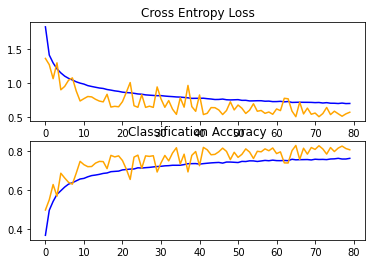

In [21]:
summarize_diagnostics(history)

In [26]:
from keras.preprocessing import image
img=x_test[2]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)

8


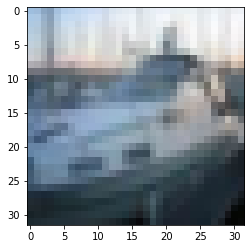

In [23]:
plt.imshow(x_test[2])

In [24]:
print(y_test[2])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
